In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import random
import matplotlib.pyplot as plt

In [2]:
# initialize variables and divide into separate datasets
df = pd.read_csv("analysis-data.csv")
hand = df[df["type"] == "hand"]
ankle = df[df["type"] == "ankle"]
pocket = df[df["type"] == "pocket"]

# Anova Model

In [3]:
#perform one-way ANOVA
res = stats.f_oneway(hand["atotal"], ankle["atotal"], pocket["atotal"])
print( "ANOVA P-VALUE: " + str(res.pvalue))

ANOVA P-VALUE: 4.179433169017044e-47


# Pairwise Tukey’s Test On Velocity Mean

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 ankle   hand   2.2542   0.0  1.7559  2.7524   True
 ankle pocket  -1.1317   0.0 -1.6556 -0.6078   True
  hand pocket  -3.3859   0.0  -3.911 -2.8608   True
---------------------------------------------------


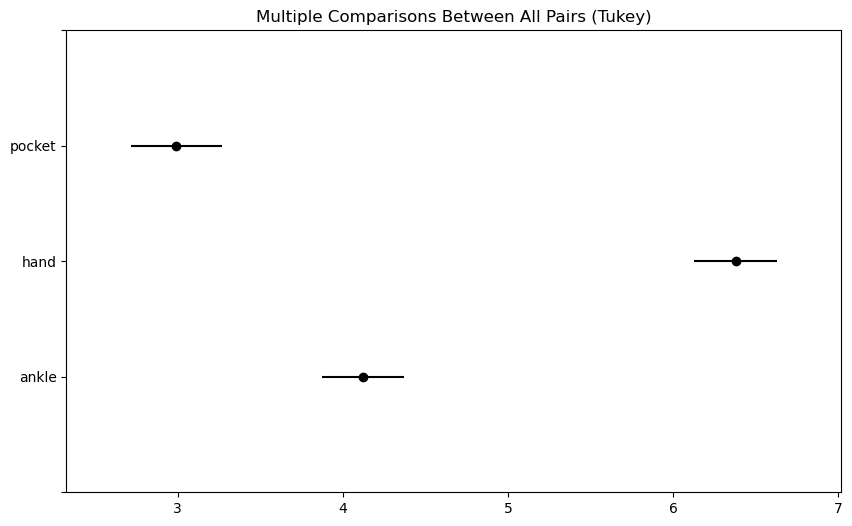

In [4]:
x_melt = pd.DataFrame(df[["type", "atotal"]])
x_melt.rename(columns={"atotal": "value", "type": "variable"}, inplace=True)

posthoc = pairwise_tukeyhsd(
    x_melt['value'], x_melt['variable'],
    alpha=0.05)

print(posthoc.summary())
fig = posthoc.plot_simultaneous()
plt.show()

# T-Test on Velocity Means (Atotal)


In [5]:
def ttest_on_velocity(df1, df2):
    ax_p_val = stats.ttest_ind(df1['ax'], df2['ax']).pvalue
    ay_p_val = stats.ttest_ind(df1['ay'], df2['ay']).pvalue
    az_p_val = stats.ttest_ind(df1['az'], df2['az']).pvalue
    
    return (ax_p_val + ay_p_val + az_p_val) / 3

ankle_pocket = ttest_on_velocity(ankle, pocket)
ankle_hand = ttest_on_velocity(ankle, hand)
hand_pocket = ttest_on_velocity(hand,pocket)

print(f"T-Test between the velocities of ANKLE and POCKET: {ankle_pocket}")
print(f"T-Test between the velocities of ANKLE and HAND: {ankle_hand}")
print(f"T-Test between the velocities of HAND and POCKET: {ankle_pocket}")


T-Test between the velocities of ANKLE and POCKET: 0.1689354529596091
T-Test between the velocities of ANKLE and HAND: 0.07792751846863388
T-Test between the velocities of HAND and POCKET: 0.1689354529596091


# Distance Comparision

In [6]:
print("total distance traveled for hand " + str(hand["distance"].sum()) + " meters")
print("total distance traveled for ankle " + str(ankle["distance"].sum()) + " meters")
print("total distance traveled for pocket " + str(pocket["distance"].sum()) + " meters")

total distance traveled for hand 589.3598371490518 meters
total distance traveled for ankle 544.1351736869123 meters
total distance traveled for pocket 528.8729096769846 meters


# Linear Regression on the Datasets

In [7]:
def lin_time_atotal(df1):
    df1 = df1.copy()
    df1['time'] = pd.to_datetime(df1['time'])
    df1['time'] = pd.to_datetime(df1['time'],unit='s')
    df1['time'] = df1.time.astype('int64') // 10**9

    reg = stats.linregress(df1['time'], df1['atotal'])
    return reg

reg = lin_time_atotal(hand)
print("Hand:")
print(reg.slope, reg.rvalue, reg.intercept)
reg = lin_time_atotal(ankle)
print("Ankle:")
print(reg.slope, reg.rvalue, reg.intercept)
reg = lin_time_atotal(pocket)
print("Pocket:")
print(reg.slope, reg.rvalue, reg.intercept)

Hand:
0.012167624604930039 0.4873042675194386 -20325033.481958065
Ankle:
0.006547917757426976 0.16980244694779953 -10938519.244304502
Pocket:
-0.023824975420905822 -0.8371908192494839 39800441.0346986


# Mann Whitney U-Test


In [8]:
def mannwhitneyu_test(df1, df2):
    lon_pval = stats.mannwhitneyu(df1['lon'], df2['lon'], alternative='two-sided').pvalue
    lat_pval = stats.mannwhitneyu(df1['lat'], df2['lat'], alternative='two-sided').pvalue
    return (lon_pval, lat_pval)

manwhit_hand_ankle = mannwhitneyu_test(hand, ankle)
manwhit_hand_pocket = mannwhitneyu_test(hand, pocket)
manwhit_ankle_pocket = mannwhitneyu_test(ankle, pocket)

print("Hand vs Ankle Mann Whiteney p-values on lon and lat: ")
print(manwhit_hand_ankle)
print("Ankle vs Pocket Mann Whiteney p-values on lon and lat: ")
print(manwhit_ankle_pocket)
print("Hand vs Pocket Mann Whiteney p-values on lon and lat: ")
print(manwhit_hand_pocket)

Hand vs Ankle Mann Whiteney p-values on lon and lat: 
(0.3817253316618108, 0.0060896501986214555)
Ankle vs Pocket Mann Whiteney p-values on lon and lat: 
(0.9933851377639636, 0.7197576855373216)
Hand vs Pocket Mann Whiteney p-values on lon and lat: 
(0.4835673575285756, 0.19340342614073136)
